In [58]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import glob
from unidecode import unidecode


In [59]:
data_path = './data/processed/2024_01_19_clean_player_data.csv'
df = pd.read_csv(data_path)

df =df.drop(columns=['Unnamed: 0'])


In [60]:
# hr_df = pd.DataFrame()

# file_pattern = './data/hr_*.csv'
# file_paths = glob.glob(file_pattern)

# for file_path in file_paths:
#     df = pd.read_csv(file_path)
#     hr_df = pd.concat([hr_df, df], ignore_index=True)


# capfriendly_path = './data/capfriendly.csv'

# cap_df = pd.read_csv(capfriendly_path)

In [61]:
wing_df = df[(df['Pos'] == 'LW') | (df['Pos'] == 'RW')]
center_df = df[df['Pos'] == 'C']
forward_df = pd.concat([wing_df, center_df])

defense_df = df[df['Pos'] == 'D']
goalie_df = df[df['Pos'] == 'G']

In [63]:
df.columns

Index(['Player', 'Age', 'Pos', 'GP', 'G', 'A', 'PTS', '+/-', 'PIM', 'EV', 'PP',
       'SH', 'GW', 'EV.1', 'PP.1', 'SH.1', 'S', 'S%', 'TOI', 'ATOI', 'OPS',
       'DPS', 'PS', 'BLK', 'HIT', 'FOW', 'FOL', 'FO%', 'Ht', 'Wt', 'S/C',
       'Exp', 'Team', 'specific_pos', 'Cap%', 'Salary'],
      dtype='object')

In [88]:
defense_df.shape

(221, 36)

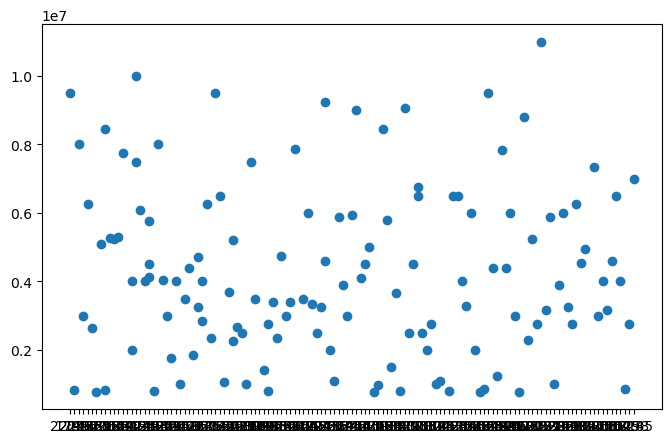

In [78]:
defense_df_filtered = defense_df[(defense_df['GP'] > 20) & (defense_df['Exp'] > 3)]

fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(defense_df_filtered['ATOI'],defense_df_filtered['Salary'])

,Player,ATOI,Salary
4,Adam Fox,22:49,9500000.0
6,Erik Gustafsson,17:15,825000.0
8,Jacob Trouba,21:51,8000000.0
13,Ryan Lindgren,19:33,3000000.0
24,Travis Sanheim,24:23,6250000.0
30,Sean Walker,19:59,2650000.0
32,Nick Seeler,17:05,775000.0
35,Rasmus Ristolainen,16:59,5100000.0
43,Sebastian Aho,16:06,8460250.0
44,Sebastian Aho,16:06,825000.0
